<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0225_Fri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
!pip install tensorflow==2.3.0

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.3.0'

In [6]:
a = tf.constant(2.0) # 변하지 않는 수
y = tf.constant(8.0)
x = tf.Variable(10.0) # 변수

print(a)
print(x)

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


In [7]:
loss = tf.math.abs(a*x - y)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [8]:
loss.numpy() # Tensor의 값을 보기

12.0

In [9]:
def train_func():
  # 미분 사용하기
  with tf.GradientTape() as tape:
    loss = tf.math.abs(a*x - y) # loss 함수에서 loss 구하기
    print("loss: {},type: {}".format(loss, type(loss)))
  # Loss함수에 대해서 x로 미분
  dx = tape.gradient(loss, x)
  print("x = {}, dx = {}".format(x.numpy(), dx))
  
  #x와 기울기 출력
  x.assign(x - dx) #weight(가중치) update

for i in range(4):
  train_func()

loss: 12.0,type: <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 10.0, dx = 2.0
loss: 8.0,type: <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 8.0, dx = 2.0
loss: 4.0,type: <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 6.0, dx = 2.0
loss: 0.0,type: <class 'tensorflow.python.framework.ops.EagerTensor'>
x = 4.0, dx = 0.0


# Mean Square Error
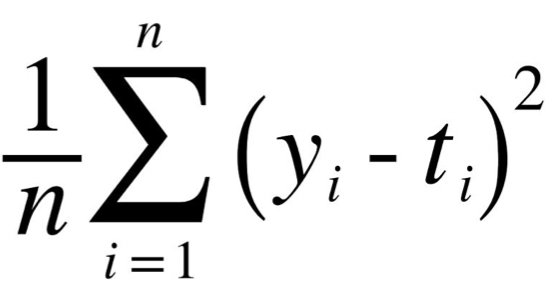

In [10]:
from tensorflow.keras import optimizers

In [11]:
%%time

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

# Momentum 적용
opt = optimizers.SGD(learning_rate=lr, momentum=0.7)

histLoss = []
for epoch in range(10000):
  with tf.GradientTape() as tape:
    loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b -y)))
  
  grads = tape.gradient(loss, var_list)
  # weight update
  opt.apply_gradients(zip(grads, var_list))

  #weight update
  # w1.assign(w1 - lr*dw1)
  # w1.assign_sub(lr*dw1)
  # w2.assign_sub(lr*dw2)
  # b.assign_sub(lr*db)

  histLoss.append(loss)
  if epoch % 50 == 0:
    print(f"epoch = {epoch}, loss = {loss}")


epoch = 0, loss = 15.339600563049316
epoch = 50, loss = 5.720717430114746
epoch = 100, loss = 4.594808101654053
epoch = 150, loss = 3.6985528469085693
epoch = 200, loss = 3.0309085845947266
epoch = 250, loss = 2.6171205043792725
epoch = 300, loss = 2.394160032272339
epoch = 350, loss = 2.267334461212158
epoch = 400, loss = 2.176950693130493
epoch = 450, loss = 2.0983705520629883
epoch = 500, loss = 2.023297071456909
epoch = 550, loss = 1.949204921722412
epoch = 600, loss = 1.875373363494873
epoch = 650, loss = 1.8016064167022705
epoch = 700, loss = 1.7278554439544678
epoch = 750, loss = 1.6541110277175903
epoch = 800, loss = 1.580366849899292
epoch = 850, loss = 1.506622076034546
epoch = 900, loss = 1.4328776597976685
epoch = 950, loss = 1.359133005142212
epoch = 1000, loss = 1.2853883504867554
epoch = 1050, loss = 1.2116435766220093
epoch = 1100, loss = 1.1378989219665527
epoch = 1150, loss = 1.0641541481018066
epoch = 1200, loss = 0.990409255027771
epoch = 1250, loss = 0.916664600372

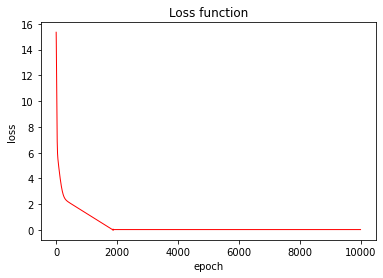

In [12]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

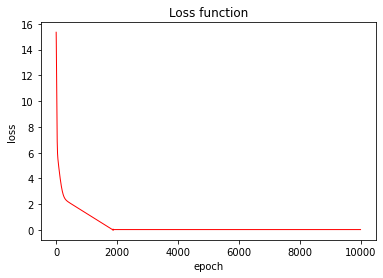

In [13]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [14]:
%%time

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

# Momentum 적용
opt = optimizers.SGD(learning_rate=lr, momentum=0.7)

histLoss = []
for epoch in range(10000):
  with tf.GradientTape() as tape:
    loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b -y)))
  
  grads = tape.gradient(loss, var_list)
  # weight update
  opt.apply_gradients(zip(grads, var_list))

  #weight update
  # w1.assign(w1 - lr*dw1)
  # w1.assign_sub(lr*dw1)
  # w2.assign_sub(lr*dw2)
  # b.assign_sub(lr*db)

  histLoss.append(loss)
  if epoch % 500 == 0:
    print(f"epoch = {epoch}, loss = {loss}")
    print(f"w1 = {w1.numpy()}, w2 = {w2.numpy()}")

epoch = 0, loss = 15.339600563049316
w1 = 1.010164737701416, w2 = 1.0009921789169312
epoch = 500, loss = 2.023297071456909
w1 = 2.202728509902954, w2 = 2.9980216026306152
epoch = 1000, loss = 1.2853883504867554
w1 = 2.128865957260132, w2 = 3.008208751678467
epoch = 1500, loss = 0.5479283928871155
w1 = 2.054847478866577, w2 = 3.0034937858581543
epoch = 2000, loss = 0.0375760979950428
w1 = 1.996767520904541, w2 = 3.0000345706939697
epoch = 2500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 3500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 4500, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5000, loss = 0.03759327903389931
w1 = 1.9967671632766724, w2 = 3.0000345706939697
epoch = 5500, loss = 0.037

In [15]:
%%time

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]

# Momentum 적용
opt = optimizers.Adam(learning_rate=lr)

def loss():
  return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
histLoss = []
for epoch in range(10000):
  opt.minimize(loss, var_list=var_list)
  
  histLoss.append(loss())
  if epoch % 500 == 0:
    print(f"epoch = {epoch}, loss = {histLoss[-1]}")
    print(f"w1 = {w1.numpy()}, w2 = {w2.numpy()}")

epoch = 0, loss = 15.327645301818848
w1 = 1.0010000467300415, w2 = 1.0010000467300415
epoch = 500, loss = 9.454402923583984
w1 = 1.4949997663497925, w2 = 1.522733211517334
epoch = 1000, loss = 4.246377468109131
w1 = 1.9493086338043213, w2 = 2.1113789081573486
epoch = 1500, loss = 1.9247740507125854
w1 = 2.162410020828247, w2 = 2.697115182876587
epoch = 2000, loss = 1.4152452945709229
w1 = 2.1440117359161377, w2 = 2.963170289993286
epoch = 2500, loss = 1.0947701930999756
w1 = 2.111696243286133, w2 = 3.0057971477508545
epoch = 3000, loss = 0.7711126208305359
w1 = 2.078336238861084, w2 = 3.0051143169403076
epoch = 3500, loss = 0.44227075576782227
w1 = 2.0447733402252197, w2 = 3.0028648376464844
epoch = 4000, loss = 0.11060690134763718
w1 = 2.011167049407959, w2 = 3.0007033348083496
epoch = 4500, loss = 0.000905002816580236
w1 = 2.0000712871551514, w2 = 2.9998841285705566
epoch = 5000, loss = 0.0009234699537046254
w1 = 2.0000758171081543, w2 = 2.999931573867798
epoch = 5500, loss = 0.00085

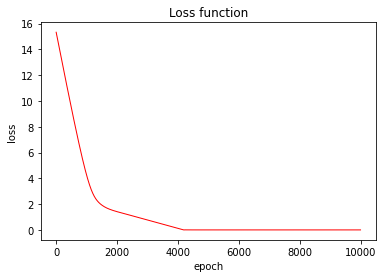

In [16]:
plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras

In [17]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
dataX = np.stack([x*x, x]).T

In [18]:
np.array([x*x, x]).shape

(2, 100)

In [19]:
np.stack([x*x, x]).T.shape

(100, 2)

In [20]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.compile(loss='mse', optimizer=optimizers.RMSprop(lr=0.05))
h = model.fit(dataX, y, batch_size=10, epochs=300)


Epoch 1/300
10/10 [==============================] - 0s 1ms/step - loss: 307.3318
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 141.3474
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 66.6158
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 31.6721
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 15.2496
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 8.1480
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 4.7194
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 2.8242
Epoch 9/300
10/10 [==============================] - 0s 2ms/step - loss: 1.7811
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 1.2095
Epoch 11/300
10/10 [==============================] - 0s 5ms/step - loss: 0.8214
Epoch 12/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4443
Epoch 13/300
10/10 [==========

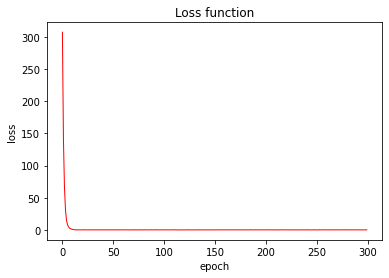

In [21]:
plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [23]:
params = model.layers[0].get_weights()
print("w1: {:.2f}".format(params[0][0][0]))
print("w2: {:.2f}".format(params[0][1][0]))
print("b: {:.2f}".format(params[1][0]))

w1: 2.03
w2: 2.91
b: 5.04


# Functional API

In [26]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3*x +5
dataX = np.stack([x*x, x]).T

xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss="mse", optimizer=optimizers.Adam(learning_rate=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 516.8004
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 319.7226
Epoch 3/300
10/10 [==============================] - 0s 2ms/step - loss: 191.5456
Epoch 4/300
10/10 [==============================] - 0s 2ms/step - loss: 107.2981
Epoch 5/300
10/10 [==============================] - 0s 2ms/step - loss: 68.9355
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 48.0492
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 36.3425
Epoch 8/300
10/10 [==============================] - 0s 2ms/step - loss: 26.9677
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 19.8719
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 14.4207
Epoch 11/300
10/10 [==============================] - 0s 2ms/step - loss: 10.5214
Epoch 12/300
10/10 [==============================] - 0s 2ms/step - loss: 7.6516
Epoch 13/300
10/10 [==

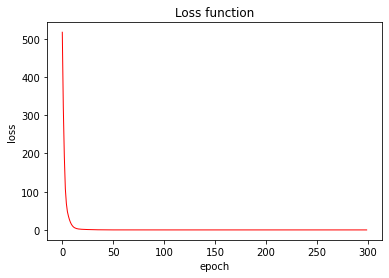

In [28]:
plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [29]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [30]:
params = model.layers[1].get_weights()
print("w1: {:.2f}".format(params[0][0][0]))
print("w2: {:.2f}".format(params[0][1][0]))
print("b: {:.2f}".format(params[1][0]))

w1: 2.00
w2: 3.00
b: 5.00


In [27]:
import tensorflow.compat.v1 as tf
tf.__version__

'2.3.0'

In [31]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [33]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [34]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3, random_state=42)

In [35]:
train_X.shape

(105, 4)

In [36]:
# x, y 의 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수의 개수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 클래스가 3개

In [37]:
W = tf.Variable(tf.zeros([4,3])) # weight shape(입력의 개수, 출력의 개수)
b = tf.Variable(tf.zeros([3])) # bias shape(출력의 개수)

In [38]:
# 출력
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [40]:
# cost function 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [41]:
# 학습 정의 - Loss 함수, optimizer
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [42]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [44]:
for i in range(100000):
  _, loss_values = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
  if i % 10000 == 0:
    print(i, loss_values)

0 0.37425947
10000 0.28379795
20000 0.23611484
30000 0.20631167
40000 0.18581773
50000 0.17079735
60000 0.15927438
70000 0.15012614
80000 0.14267017
90000 0.13646227


In [45]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [46]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [47]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

1.0


In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [52]:
n_features = train_X.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features, )))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(train_X, np.argmax(train_y, axis=1), epochs=300, batch_size=32)

Train on 105 samples
Epoch 1/300
105/105 [==============================] - 0s 182us/sample - loss: 0.1194 - acc: 0.9714
Epoch 2/300
105/105 [==============================] - 0s 135us/sample - loss: 0.1190 - acc: 0.9714
Epoch 3/300
105/105 [==============================] - 0s 134us/sample - loss: 0.1192 - acc: 0.9714
Epoch 4/300
105/105 [==============================] - 0s 137us/sample - loss: 0.1190 - acc: 0.9714
Epoch 5/300
105/105 [==============================] - 0s 167us/sample - loss: 0.1186 - acc: 0.9619
Epoch 6/300
105/105 [==============================] - 0s 195us/sample - loss: 0.1180 - acc: 0.9714
Epoch 7/300
105/105 [==============================] - 0s 132us/sample - loss: 0.1178 - acc: 0.9619
Epoch 8/300
105/105 [==============================] - 0s 139us/sample - loss: 0.1180 - acc: 0.9714
Epoch 9/300
105/105 [==============================] - 0s 118us/sample - loss: 0.1171 - acc: 0.9714
Epoch 10/300
105/105 [==============================] - 0s 145us/sample - loss:

In [59]:
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy: {acc}')

test accuracy: 1.0


In [60]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.002, decay=0.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1),verbose=0, epochs=300, batch_size=32)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy: {acc}')

test accuracy: 1.0


# Functional API

In [65]:
input_layer = Input(shape=(n_features, ))
hidden_layer_1 = Dense(10)(input_layer)
hidden_layer_2 = Dense(8)(hidden_layer_1)
output_layer = Dense(3, activation='softmax')(hidden_layer_2)

model = Model(input_layer, output_layer)

In [66]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.002, decay=0.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, np.argmax(train_y, axis=1),verbose=0, epochs=300, batch_size=32)
loss, acc = model.evaluate(test_X, np.argmax(test_y, axis=1), verbose=0)
print(f'test accuracy: {acc}')

test accuracy: 1.0
